# Lab Exercise 02: Exploring Fourier Decomposition and Visible Light

## Objective:
In this lab, you will use Python to explore how light waves can be represented by sine and cosine functions, and how Fourier decomposition can be used to break down complex signals into their component frequencies. You will also adjust the time axis to see how it affects the representation of waves.

**Answer** this notebook by updating the **Answers for Part. x** cell by **double clicking and typing your answers in a cell**. After finishing this notebook, upload in your github repository (**meteo203-2425-lastname/exercises/exercise_02_simulatinglight.ipynb**)

---
## Part 1: Generating a Single Wavelength Light Wave

**Task**: Use the code below to generate and plot a sine wave representing a single light wave.

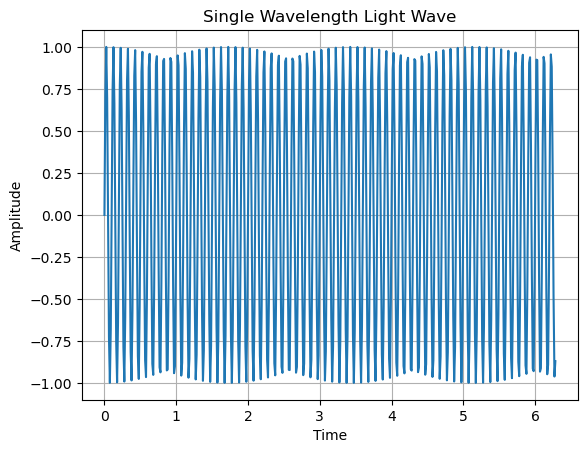

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
A = 1  # Amplitude
f = 10  # Frequency (in arbitrary units)
t = np.linspace(0, 2*np.pi, 500)  # Time array (0 to 2pi)

# Generate the sine wave for a single wavelength
wave = A * np.sin(2 * np.pi * f * t)

# Plot the wave
plt.plot(t, wave)
plt.title("Single Wavelength Light Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


### Questions for Part 1:

1. How many oscillations (peaks) do you see in the plot? What does the frequency ($f=5$) represent?
2. What happens if you increase the frequency to 10? Try changing $f=10$ in the code and re-run the cell.

### Answers for Part 1:
1. 30 oscillations. The frequency is the number of oscillations the light wave does over a certain period of time.
2. The number of oscillations increased, proving the previous answer.

---

## Part 2.: Reducing the Time Axis.
**Task**: Modify the time axis to range from $0$ to $\pi$ and then re-run the code.


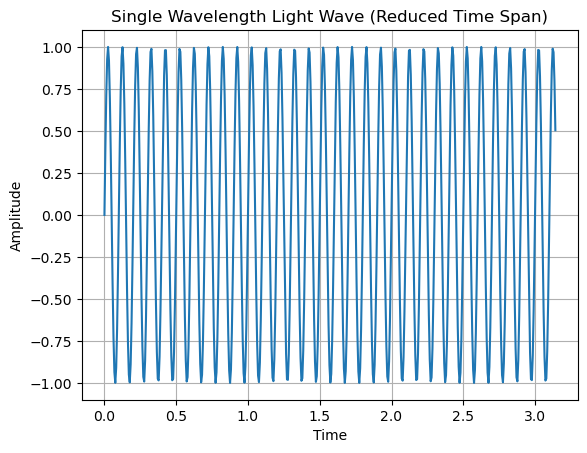

In [18]:
# Adjust the time axis to a shorter range
t = np.linspace(0, np.pi, 500) # insert updated code here

# Generate the sine wave for the same frequency
wave = A * np.sin(2 * np.pi * f * t)

# Plot the wave
plt.plot(t, wave)
plt.title("Single Wavelength Light Wave (Reduced Time Span)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


### Questions for Part 2:
1. How many peaks do you see now compared to the original time range?
2. What is the effect of reducing the time axis on the appearance of the wave?

### Answers for Part 2:
1. The number of oscillations is reduced
2. the number of oscillations shown is reduced due to the time being shortened

---
## Part 3: Combining Multiple Waves (Simulating White Light)

Now, let's combine multiple sine waves (representing different wavelengths of light) to simulate white light.

**Task**: Run the following code to generate the combined wave.

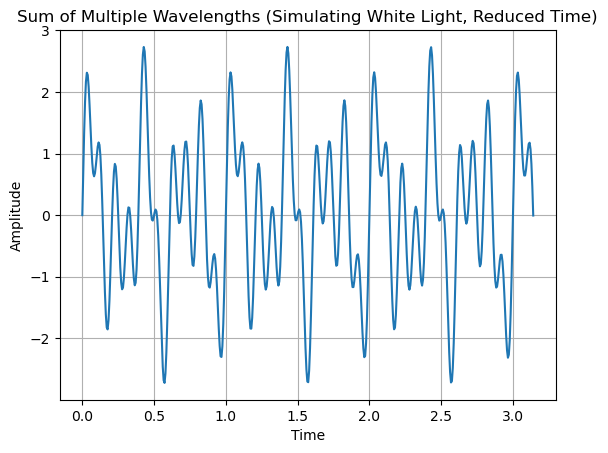

In [23]:
# Define multiple frequencies
freqs = [3,5,10] # Arbitrary frequencies representing different colors

# Generate the sum of waves
combined_wave = np.zeros_like(t)
for f in freqs:
    combined_wave += A * np.sin(2 * np.pi * f * t)

# Plot the combined wave
plt.plot(t, combined_wave)
plt.title("Sum of Multiple Wavelengths (Simulating White Light, Reduced Time)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


### Questions for Part 3:

1. What happens when you combine multiple sine waves of different frequencies?
2. Does the combined wave still look like a sine wave? Why or why not?

### Answers for Part 3:
1. The combined sine waves became noisier with varying peaks.
2. The combined sine waves may still look like they carry a pattern. However, there is too much noise and doesn't look like a clear-cut sine wave.

---
## Part 4: Fourier Analysis of the Combined Wave

Now we will perform a Fourier transform to decompose the combined wave into its frequency components.

**Task**: Run the Fourier transform code and observe the output.

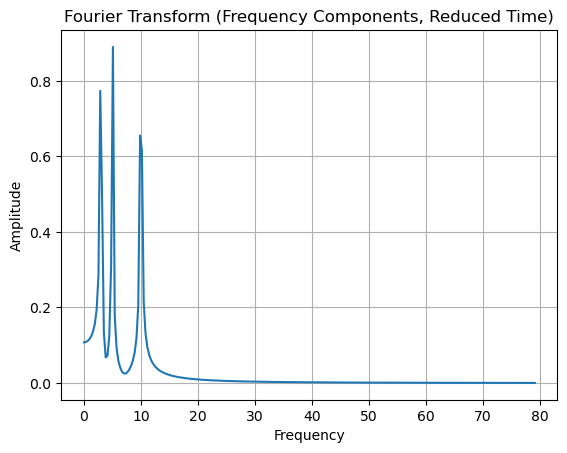

In [24]:
from scipy.fft import fft, fftfreq

# Perform Fourier Transform
N = len(t)
T = t[1] - t[0]  # Sampling interval
yf = fft(combined_wave)
xf = fftfreq(N, T)[:N//2]

# Plot the Fourier Transform (showing the frequency components)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Fourier Transform (Frequency Components, Reduced Time)")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Questions for Part 4:

1. Look at the Fourier transform plot. What do the peaks in the plot represent?
2. How do the peaks relate to the frequencies of the individual sine waves you combined in the previous section?
3. Why is Fourier analysis useful for breaking down complex signals like white light or other waveforms into their individual frequency components?

### Answers for Part 4:
1. This graph represents each oscillation and their frequency.
2. The peaks here are basically segregated by their amplitude and frequency, showing the difference in each oscillation.
3. The Fourier analysis basically helps in determining what signals are useful depending on how it is used. It also segregates what are noise and anomalies.

---
## Part 5: Exploring the Nyquist Frequency

The **Nyquist frequency** is the highest frequency that can be accurately captured with a given sampling rate. According to the **Nyquist theorem**, the sampling rate must be **at least twice the highest frequency present** in the signal to avoid **aliasing** (when high-frequency signals appear as lower frequencies due to under-sampling).

**Task**: Let's experiment with changing the number of samples and observe how it affects the ability to capture the wave frequencies.

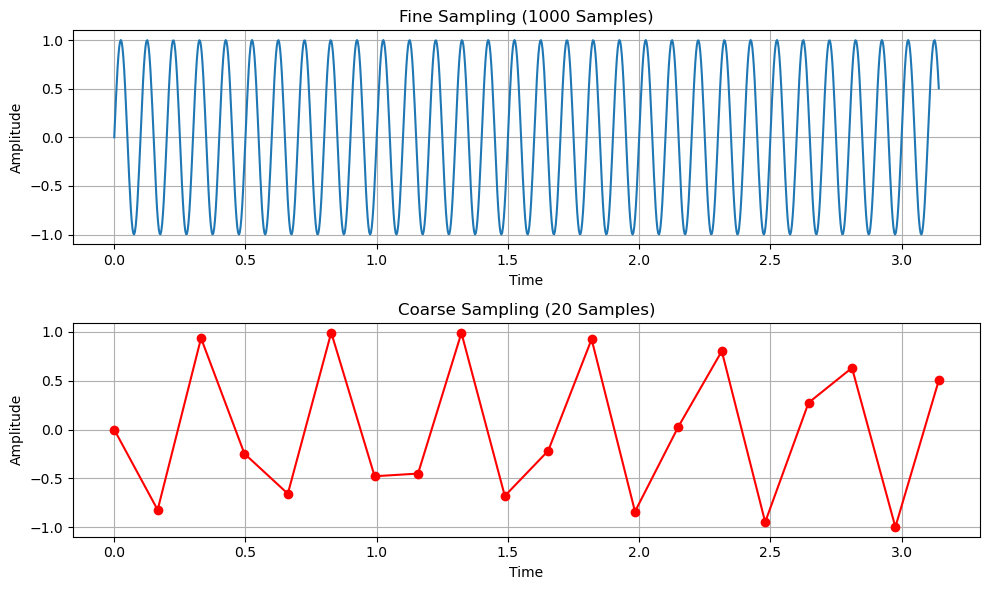

In [25]:
# Adjust the number of samples (sampling rate)
t_fine = np.linspace(0, np.pi, 1000)  # High sampling rate (1000 samples)
t_coarse = np.linspace(0, np.pi, 20)  # Low sampling rate (20 samples)

# Generate the same sine wave for a single frequency (f = 10)
wave_fine = A * np.sin(2 * np.pi * 10 * t_fine)
wave_coarse = A * np.sin(2 * np.pi * 10 * t_coarse)

# Plot the wave with different sampling rates
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_fine, wave_fine, label="Fine Sampling")
plt.title("Fine Sampling (1000 Samples)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_coarse, wave_coarse, 'o-', label="Coarse Sampling", color='r')
plt.title("Coarse Sampling (20 Samples)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


### Questions for Part 5:

1. Compare the plots from the fine sampling and coarse sampling. How does reducing the number of samples affect your ability to resolve the wave?
2. What happens to the shape of the wave when you reduce the number of samples?

### Answers for Part 5:
1. The fine sampling basically includes a larger amount of data points while the course sampling only takes up a few data points. This shows that there are lapses in the data and the patterns the data may produce, therefore increasing the chance of variability.
2. The shape becomes jagged and chaotic as compared to many data points where it is more uniformed and defined.

---
## Part 6: Nyquist Frequency and Aliasing

Let’s investigate Nyquist frequency by setting the sampling rate at the Nyquist limit and below it to see the effects of aliasing.

**Task**: Set up a scenario where the sampling rate is just at, or lower than, the Nyquist limit, and observe the results.

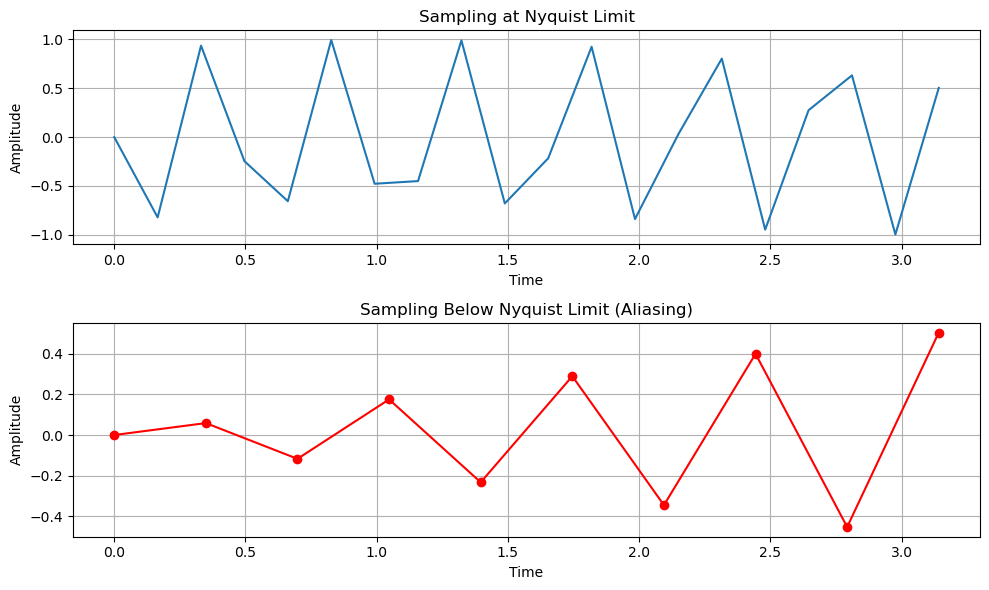

In [32]:
# Nyquist theorem: Sampling rate must be twice the highest frequency (f = 10)

# Fine sampling (Nyquist limit)
sampling_rate_fine = 2 * 10  # Nyquist limit: twice the frequency
t_fine_nyquist = np.linspace(0, np.pi, sampling_rate_fine)

# Coarse sampling (below Nyquist limit)
sampling_rate_coarse = 10  # Sampling below the Nyquist limit
t_coarse_nyquist = np.linspace(0, np.pi, sampling_rate_coarse)

# Generate the wave
wave_fine_nyquist = A * np.sin(2 * np.pi * 10 * t_fine_nyquist)
wave_coarse_nyquist = A * np.sin(2 * np.pi * 10 * t_coarse_nyquist)

# Plot the wave with different sampling rates (Nyquist limit vs below)
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_fine_nyquist, wave_fine_nyquist, label="At Nyquist Limit")
plt.title("Sampling at Nyquist Limit")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_coarse_nyquist, wave_coarse_nyquist, 'o-', label="Below Nyquist Limit", color='r')
plt.title("Sampling Below Nyquist Limit (Aliasing)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


### Questions for Part 6:

1. What do you observe when sampling at the Nyquist limit versus below the Nyquist limit?
2. Describe the effect of aliasing: How does the wave appear when sampled below the Nyquist frequency? Why does it appear distorted?

### Answers for Part 6:
1. The At limit shows a more jagged plot with more disturbances, while the below limit shows a more streamlined and uniform plot.
2. The below shows a more prominent trend of rising amplitude as compared to the at limit.

---
## Conclusion

In this lab exercise, you:

- Simulated light waves using sine functions.
- Combined multiple sine waves to represent "white light."
- Performed Fourier analysis to break down complex signals into their frequency components.
- Explored how the Nyquist frequency and sampling rate affect the ability to capture and represent signals accurately, especially in relation to aliasing.

### Final Questions:
1. Why is it important to sample at a rate at least twice the highest frequency present in a signal (as per the Nyquist theorem)?
2. How does aliasing affect real-world measurements in fields like meteorology and oceanography? Give examples (e.g., wind speed or ocean current measurements).

### Answer to Final question:

1. This is to preserve the signal's unbiased data points and show the discrepancies and nuances that are evident in real world data.
2. Aliasing could lead to misinterpretation due to streamlining of data.